# Movies Correlation Project
This project explores the relationship between various movie features, such as budget, gross revenue, and votes. The dataset undergoes cleaning, imputation, and visualization to identify key patterns.

In [1]:
#Import Libraries
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

## Data Loading
The dataset is loaded from a CSV file. Initial exploration provides insights into its structure and missing values.

In [76]:
#Read Data
data1 = pd.read_csv('C:/Users/ahmed/Downloads/movies.csv/movies.csv')

In [3]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Handling Missing Values
We use the **KNN Imputer** to handle missing values for numerical features such as 'budget', 'votes', and 'gross'.

### Correlation Analysis
A correlation matrix helps us identify relationships between features to guide imputation.

**Handel missing values using KNN imputer
**First using the correlation matrix to determine the most coorelated feature with the budget

In [6]:
data[['votes','budget','gross','runtime','score','year']].corr()

,votes,budget,gross,runtime,score,year
votes,1.000000,0.442429,0.630757,0.309212,0.409182,0.222945
budget,0.442429,1.000000,0.740395,0.320447,0.076254,0.329321
gross,0.630757,0.740395,1.000000,0.245216,0.186258,0.257486
runtime,0.309212,0.320447,0.245216,1.000000,0.399451,0.120811
score,0.409182,0.076254,0.186258,0.399451,1.000000,0.097995
year,0.222945,0.329321,0.257486,0.120811,0.097995,1.000000


In [10]:
from sklearn.impute import KNNImputer
selected_columns =['budget','votes','gross']
data_subset = data[selected_columns]
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_subset)

In [11]:
data_imputed = pd.DataFrame(data_imputed,columns=selected_columns)
data['budget'] = data_imputed['budget']

## Dropping Irrelevant Features
Since 'released' has many null values, it is dropped from the dataset.

In [14]:
#Drop released column because it has null values and keep year
data.drop(columns='released',inplace  =True)

## Data Transformation
We convert numerical columns to integers for better visualization and drop any remaining null values.

In [20]:
#Since no float numbers in votes, budget, gross and runtime we changed it to integer for illustration purposes
data[['votes','budget','gross','runtime']].astype('int')

,votes,budget,gross,runtime
0,927000,19000000,46998772,146
1,65000,4500000,58853106,104
2,1200000,18000000,538375067,124
3,221000,3500000,83453539,88
4,108000,6000000,39846344,98
...,...,...,...,...
7651,42000,135000000,111105497,100
7652,3700,80000000,461421559,149
7653,2400,2897000,3661,98
7656,294,2120600,413378,120


In [17]:
data.isnull().sum()

name          0
rating       77
genre         0
year          0
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [18]:
data = data.dropna()

## Correlation Heatmap
We generate a heatmap to visualize the relationships between numerical features. This helps identify highly correlated variables.

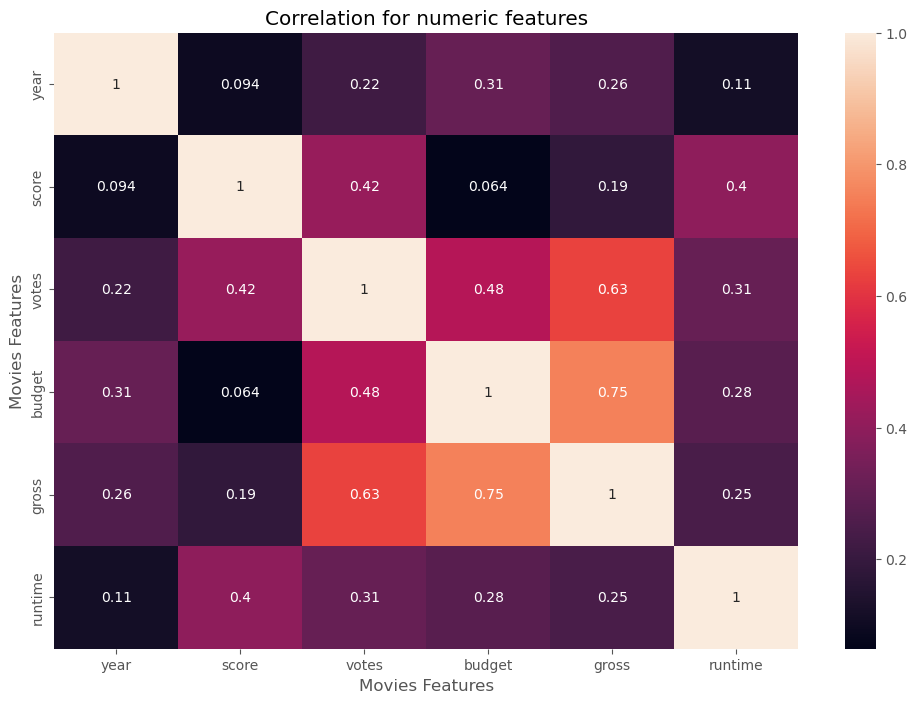

In [47]:
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

## Budget vs. Gross Revenue
A scatter plot with a regression line illustrates the relationship between budget and gross revenue.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


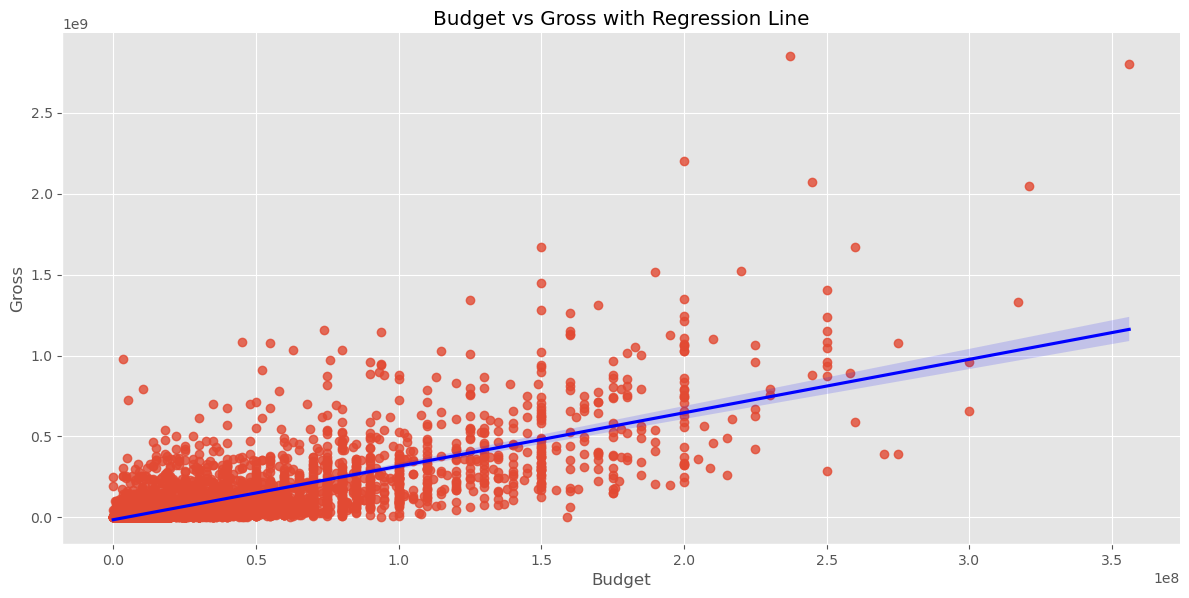

In [59]:


# Create a scatter plot with a regression line
sns.lmplot(x='budget', y='gross', data=data,aspect=2,height=6,line_kws={'color':'blue'})

plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross with Regression Line')

plt.show()
